## 1차원 데이터
- 평균값(기댓값), 표본분산 불편분산(ddof=1), 표준편차
- 표본분산은 표본의 평균을 사용해서 분산을 계산한 값으로 분산을 과소 추정하는 경향이 있으며그 경향을 없애기 위한 것이 불편분산임. 표본분산보다 조금 큰 값이 된다.
- 표준화: 평균값이 큰 변수와 작은 변수가 섞여 있으면 다루기 어려우므로 표준화로 데이터를 비교하기 쉽게 한다.
- 최댓값, 최솟값, 중앙값, 사분위수
- 표본분산과 비편향 분산
 - 분산은 표본분산과 불편분산(unbiased variance)의 두 종류가 존재
 - 표본 분산은 표본에서 계산된 분산이며 모집단에 비해 표본수가 적을 때는 표본 분산의 모분산보다 작아진다.
 - 즉 표본 분산이 모집단 분산에 맞춰서 동일하게 보정한 것을 비편향 분산이라 한다.
 - 통계학에서는 이 비편향분산을 사용하는 경우가 많다
 - 불편분산은 n 대신 n-1로 나누어 구할 수 있다.
 
[표본분산이 분산을 과소평가하는 이유] 
- 호수 안에 물고기가 7마리 있다. 몸 길이가 {1,2,3,4,5,6,7}, 모평균 4, 샘플링1 3마리 {1,2,3} 표본평균 2, 샘플링2 {5,6,7} 표본평균 6
- 이때 분산은 모평균을 모르기 때문에 표본 평균과의 거리를 계산하며 분산을 과소평가하게 된다.
- 표본 분산보다 조금 더 큰 값이 되도록 보정하기 위하여 n 대신 n-1로 나누어 불편분산을 구할 수 있다.

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('./data/ch2_scores_em.csv')
df.head()

,student number,english,mathematics
0,1,42,65
1,2,69,80
2,3,56,63
3,4,41,63
4,5,57,76


In [2]:
scores = np.array(df.english)[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [3]:
score_df = pd.DataFrame({'score':scores},
                        index = pd.Index(['A','B','C','D','E','F','G','H','I','J'],
                       name = 'student'))
score_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


In [4]:
display(sum(scores)/len(scores),score_df.mean())
display(score_df.max())
display(score_df.min())
display(score_df.std())

55.0

score    55.0
dtype: float64

score    69
dtype: int64

score    41
dtype: int64

score    9.775252
dtype: float64

In [5]:
# 중앙값
sorted_scores = np.sort(scores)
display(sorted_scores)
a = sorted_scores[len(sorted_scores)//2]
if len(sorted_scores)%2 == 0:
    b = sorted_scores[len(sorted_scores)//2-1]
    print((a+b)/2)
else:
    print(a)

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69], dtype=int64)

56.5


In [6]:
score_df.quantile(.50)

score    56.5
Name: 0.5, dtype: float64

In [7]:
np.median(scores)

56.5

In [8]:
#최빈값
pd.Series([1,1,1,1,1,1,1,2,2,2,2,2,2,3,3,3,3,4,4,4,4,4]).mode()

0    1
dtype: int64

In [9]:
#편차
mean = np.mean(scores)
print(mean)
deviation = scores -mean
deviation

55.0


array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [10]:
# 20개의 원소로 구성되는 배열을 만든 후 평균, 편차 및 편차의 합을 구하세요.

arr = np.random.randint(0,1000,size = 20)
m = np.mean(arr)
display(m)
dev = arr-m
display(dev)
display(np.sum(dev))

475.2

array([-337.2,  251.8,  274.8, -153.2, -169.2,  313.8,  116.8,   15.8,
        159.8,   30.8, -386.2,  132.8,    7.8, -400.2,  496.8,   68.8,
         39.8,   50.8, -424.2,  -90.2])

2.2737367544323206e-13

분산
- numpy와 pandas는 서로 다른 분산을 기본으로 설정하여 계산
 * numpy는 표본분산, pandas는 불편분산
 * pandas에서 표본분산을 계산하려면 var 메소드의 인수를 ddof = 0이라고 설정, 불편분산은 ddof=1일 때 해당됨.


In [11]:
np.mean(deviation**2) #표본분산

86.0

In [12]:
np.var(scores) #표본분산

86.0

In [13]:
score_df.var() #불편분산 > 편향되지 않은 평균에 의한 분산

score    95.555556
dtype: float64

In [14]:
df=score_df.copy()
df['deviation'] = deviation
df['square of deviation'] = np.square(deviation)
df

,score,deviation,square of deviation
student,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


In [15]:
df.mean()

score                  55.0
deviation               0.0
square of deviation    86.0
dtype: float64

In [16]:
# 표준편차
np.sqrt(np.var(scores,ddof=0))

9.273618495495704

In [17]:
np.std(scores,ddof=1)

9.775252199076787

In [18]:
df.std(ddof=0)

score                   9.273618
deviation               9.273618
square of deviation    74.315543
dtype: float64

In [19]:
#범위와 4분위수 범위
np.max(scores) - np.min(scores)

28

In [20]:
scores_Q1 = np.percentile(scores,25)
scores_Q3 = np.percentile(scores,75)
scores_IQR = scores_Q3 - scores_Q1
print(scores_Q1,scores_Q3,scores_IQR)

48.25 63.25 15.0


In [21]:
pd.Series(scores).describe()

count    10.000000
mean     55.000000
std       9.775252
min      41.000000
25%      48.250000
50%      56.500000
75%      63.250000
max      69.000000
dtype: float64

In [22]:
# 데이터의 정규화
print(f'평균 : {scores.mean()}, 표준편차: {scores.std().round(4)}')

평균 : 55.0, 표준편차: 9.2736


In [23]:
# 표준화 : 평균 0 표준편차 1
z = (scores-np.mean(scores))/np.std(scores)
z

array([-1.40182605,  1.50965882,  0.10783277, -1.50965882,  0.21566555,
       -0.75482941,  1.07832773, -0.64699664,  1.07832773,  0.32349832])

In [24]:
np.mean(z).round(4),np.std(z).round(4)

(-0.0, 1.0)

In [25]:
zz = 50+10*(scores-np.mean(scores))/np.std(scores)
zz

array([35.98173948, 65.09658825, 51.07832773, 34.90341175, 52.15665546,
       42.45170588, 60.78327732, 43.53003361, 60.78327732, 53.2349832 ])

In [26]:
np.mean(zz).round(4),np.std(zz).round(4)

(50.0, 10.0)

In [27]:
score_df['deviation_value'] = z
score_df

,score,deviation_value
student,,
A,42,-1.401826
B,69,1.509659
C,56,0.107833
D,41,-1.509659
E,57,0.215666
F,48,-0.754829
G,65,1.078328
H,49,-0.646997
I,65,1.078328


In [28]:
score_df.describe().round(4)

,score,deviation_value
count,10.0000,10.0000
mean,55.0000,-0.0000
std,9.7753,1.0541
min,41.0000,-1.5097
25%,48.2500,-0.7279
50%,56.5000,0.1617
75%,63.2500,0.8896
max,69.0000,1.5097


In [29]:
freq,_=np.histogram(score_df.score,bins=10,range=(0,100))
freq

array([0, 0, 0, 0, 4, 3, 3, 0, 0, 0], dtype=int64)

In [30]:
freq_class = [f'{i}~{i+10}' for i in range(0,100,10)]
freq_dist_df = pd.DataFrame({'frequency':freq},index = pd.Index(freq_class,name='class'))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,0
40~50,4
50~60,3
60~70,3
70~80,0
80~90,0


In [31]:
# 계급값 : 각 계급을 대표하는 값으로 계급의 중앙값이 이용됨
class_value = [(i+(i+10))//2 for i in range(0,100,10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [32]:
# 상대도수 : 해당 계급의 데이터의 상대적인 비율

rel_freq = freq/freq.sum()
rel_freq

array([0. , 0. , 0. , 0. , 0.4, 0.3, 0.3, 0. , 0. , 0. ])

In [33]:
# 누적상대도수 : 해당계급까지의 상대도수 합
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0. , 0. , 0. , 0. , 0.4, 0.7, 1. , 1. , 1. , 1. ])

In [34]:
freq_dist_df['class_value'] = class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq
freq_dist_df

,frequency,class_value,relative frequency,cumulative relative frequency
class,,,,
0~10,0,5,0.0,0.0
10~20,0,15,0.0,0.0
20~30,0,25,0.0,0.0
30~40,0,35,0.0,0.0
40~50,4,45,0.4,0.4
50~60,3,55,0.3,0.7
60~70,3,65,0.3,1.0
70~80,0,75,0.0,1.0
80~90,0,85,0.0,1.0


In [35]:
# 최빈값
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(),'class_value']

45

In [36]:
import matplotlib.pyplot as plt
eng_score = df['english']

fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(111)

# Y축의 스케일이 다른 그래프를  ax1과 동일한 영역에 생성
ax2 = ax1.twinx()
# 상대도수의 히스토그램으로 하기 위해서는 도수를 데이터의 수로 나눌 필요가 있음
weights = np.ones_like(eng_score)/len(eng_score)

rel_freq,_,_ = ax1.hist(eng_score,bins=25,range=(0,100),weights=weights)

cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(0,100,4)]

ax2.plot(class_value,cum_rel_freq, ls='--',marker='o',color='gray')
ax2.grid(visible=False)


ax1.set_xlabel('score')
ax1.set_ylabel('person number')
ax1.set_xticks(np.linspace(0,100,25+1))

plt.show()
plt.close()

KeyError: 'english'

In [ ]:
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111)
ax.boxplot(eng_score, labels=['english'])
plt.show()
plt.close()

In [ ]:
# 표본분산
data = np.array([2,3,3,4,4,4,4,5,5,6])
mu = np.sum(data)/len(data)
s = np.sum((data-mu)**2)/len(data)
s

In [ ]:
# 불편 분산

s1 = np.sum((data-mu)**2)/(len(data)-1)
s1

https://m.blog.naver.com/ao9364/222023124818

In [ ]:
# [과제] 1변향 데이터 data에 대하여 평균, 불편분산, 편차, 표준편차, 최대, 최소, 4분위수, 중앙값을 구하세요
# 단 함수를 사용하는 경우와 사용하지 않는 경우를 모두 수행
data = np.array([2,3,3,4,4,4,4,5,5,6])
data

## 2차원 데이터

In [37]:
df = pd.read_csv('./data/ch2_scores_em.csv',index_col='student number')
en_scores = np.array(df.english)[:10]
ms_scores = np.array(df.mathematics)[:10]
sdf = pd.DataFrame({'english':en_scores,'mathematics':ms_scores},
                  index = pd.Index(['A','B','C','D','E','F','G','H','I','J'],
                       name = 'student'))
sdf

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


In [38]:
# 공분산
dfc = sdf.copy()
dfc['eng_deviation'] = dfc.english - dfc.english.mean()
dfc['math_deviation'] = dfc.mathematics - dfc.mathematics.mean()
dfc['product of deviation'] = dfc['eng_deviation']*dfc['math_deviation']
dfc

,english,mathematics,eng_deviation,math_deviation,product of deviation
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [39]:
dfc['product of deviation'].mean()

62.8

In [40]:
cov_mat = np.cov(en_scores,ms_scores, ddof=0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [41]:
np.var(en_scores,ddof=0),np.var(ms_scores,ddof=0)

(86.0, 68.44000000000001)

In [42]:
# 상관계수
np.cov(en_scores,ms_scores,ddof=0)[0,1]/(np.std(en_scores)*np.std(ms_scores))

0.8185692341186713

In [43]:
np.corrcoef(en_scores,ms_scores)

array([[1.        , 0.81856923],
       [0.81856923, 1.        ]])

In [44]:
sdf.corr()

,english,mathematics
english,1.000000,0.818569
mathematics,0.818569,1.000000


In [45]:
# 과제 2행 10열 2차원의 배열을 생성하고 두 열간의 공분산, 상관계수를 구하세요(단, numpy, pandas 두가지 방식으로 모두 수행)

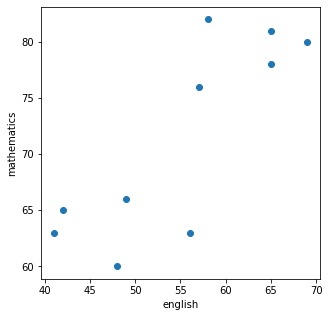

In [46]:
# 산점도

df2 = sdf.copy()

fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(111)
ax.scatter(df2.english,df2.mathematics)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
plt.show()
plt.close()

다항곡선 회귀분석

기본문법 : p = polyfit(x,y,n)

https://qlsenddl-lab.tistory.com/48

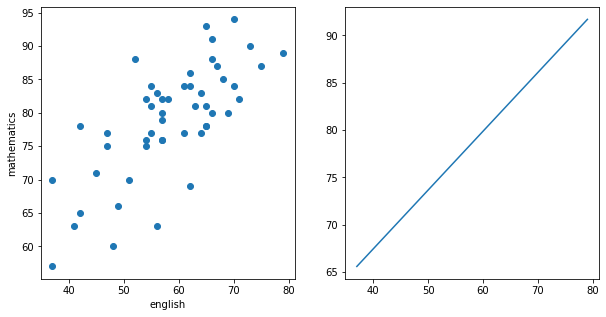

In [64]:
#회귀 직선

eng_scores = np.array(df['english'])
math_scores=np.array(df['mathematics'])

#계수 구하기
poly_fit = np.polyfit(eng_scores,math_scores,1)
poly_1d = np.poly1d(poly_fit)
xs = np.linspace(eng_scores.min(),eng_scores.max())
ys = poly_1d(xs)
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.scatter(eng_scores,math_scores)
ax2.plot(xs,ys)
ax1.set_xlabel('english')
ax1.set_ylabel('mathematics')
plt.show()
plt.close()

<AxesSubplot:xlabel='english', ylabel='mathematics'>

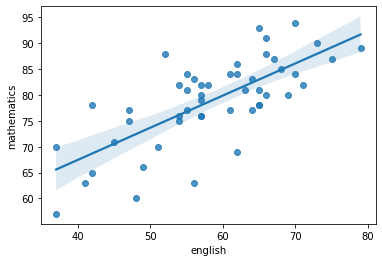

In [63]:
import seaborn as sns
sns.regplot(x='english',y='mathematics',data=df,fit_reg=True)

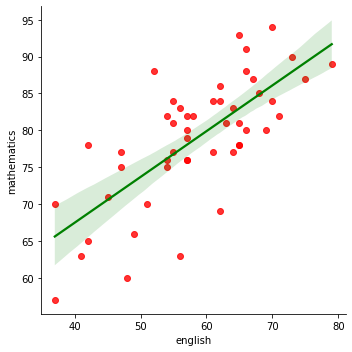

In [66]:
sns.lmplot(x='english',y='mathematics',data=df,scatter_kws = {'color':'red'},line_kws={'color':'green'})

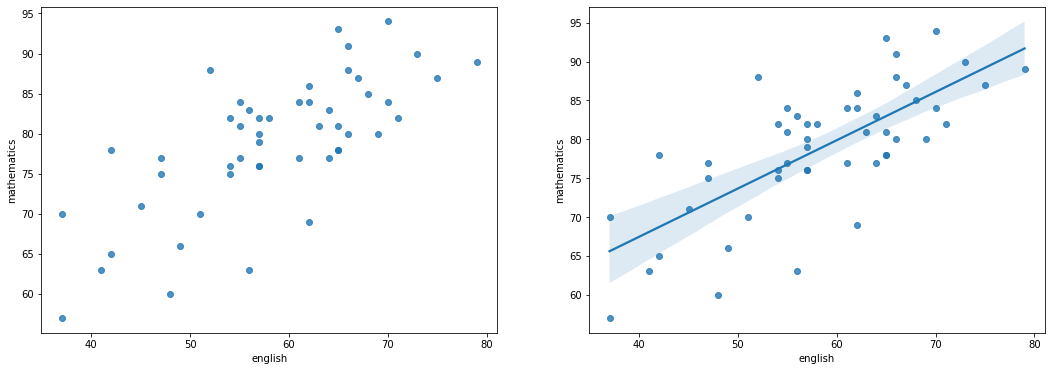

In [68]:
fig, axes = plt.subplots(1,2,figsize=(18,6),sharex=True)
sns.regplot(ax=axes[0],x=df.english,y=df.mathematics, fit_reg=False)
sns.regplot(ax=axes[1],x=df.english,y=df.mathematics)
plt.show()
plt.close()

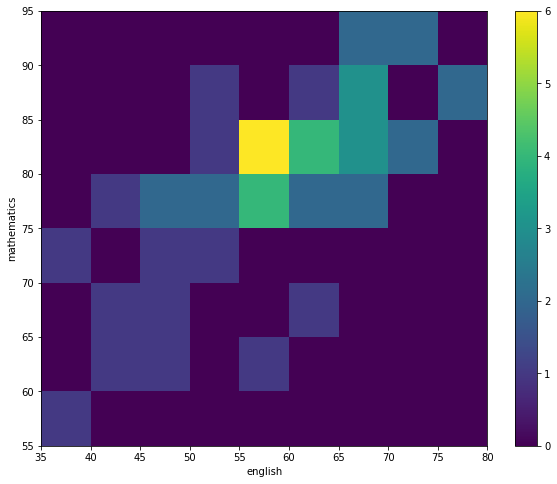

In [70]:
# 히트맵
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

c= ax.hist2d(eng_scores,math_scores,bins=[9,8],range=[(35,80),(55,95)])

ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.set_xticks(c[1])
ax.set_yticks(c[2])
fig.colorbar(c[3],ax=ax)
plt.show()
plt.close()

<AxesSubplot:>

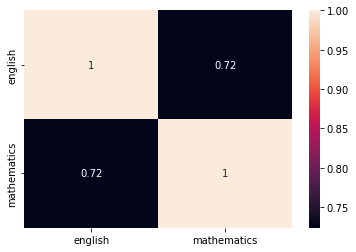

In [73]:
# english와 mathematics 두 변수의 상관관계를 히트맵으로 표현하세요
sns.heatmap(df.corr(),annot = True)

In [76]:
anscombe_data=np.load('./data/ch3_anscombe.npy')
print(anscombe_data.shape)
anscombe_data[0]

(4, 11, 2)


array([[10.  ,  8.04],
       [ 8.  ,  6.95],
       [13.  ,  7.58],
       [ 9.  ,  8.81],
       [11.  ,  8.33],
       [14.  ,  9.96],
       [ 6.  ,  7.24],
       [ 4.  ,  4.26],
       [12.  , 10.84],
       [ 7.  ,  4.82],
       [ 5.  ,  5.68]])

In [77]:
stats_df = pd.DataFrame(index = ['X_mean','X_variance','Y_mean','Y_variance','X&Y_correlation','X&Y_regression line'])
for i, data in enumerate(anscombe_data):
    dataX = data[:,0]
    dataY = data[:,1]
    poly_fit = np.polyfit(dataX,dataY,1)
    stats_df[f'data{i+1}'] = [f'{np.mean(dataX):.2f}',
                             f'{np.var(dataX):.2f}',
                             f'{np.mean(dataY):.2f}',
                             f'{np.var(dataY):.2f}',
                             f'{np.corrcoef(dataX,dataY)[0,1]:.2f}',
                             f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x']
stats_df

,data1,data2,data3,data4
X_mean,9.00,9.00,9.00,9.00
X_variance,10.00,10.00,10.00,10.00
Y_mean,7.50,7.50,7.50,7.50
Y_variance,3.75,3.75,3.75,3.75
X&Y_correlation,0.82,0.82,0.82,0.82
X&Y_regression line,3.00+0.50x,3.00+0.50x,3.00+0.50x,3.00+0.50x


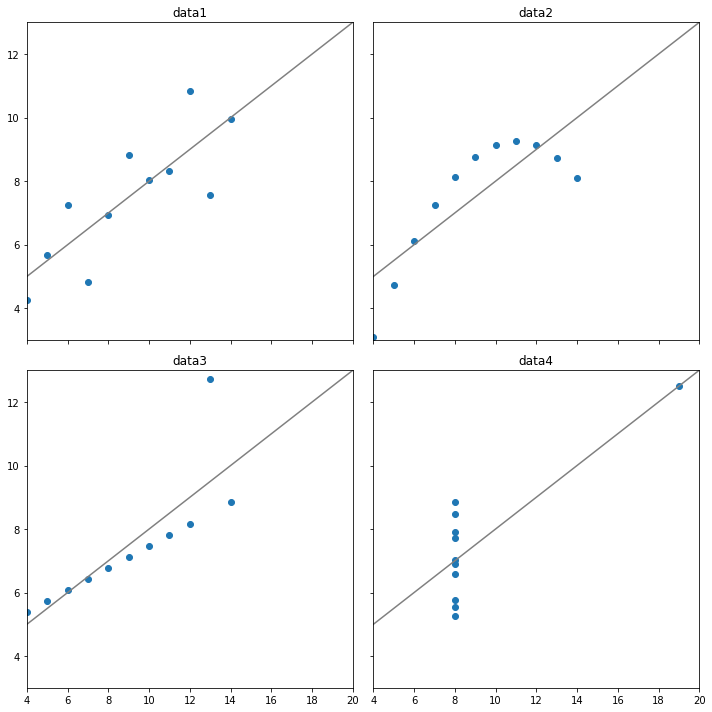

In [81]:
# 시각적, 통계적인 데이터 활용
fig,axes=plt.subplots(nrows = 2, ncols = 2, figsize = (10,10), sharex = True, sharey= True)

xs = np.linspace(0,30,100)
for i, data in enumerate(anscombe_data):
    poly_fit = np.polyfit(data[:,0],data[:,1],1)
    poly_1d = np.poly1d(poly_fit)
    ys = poly_1d(xs)
    ax = axes[i//2,i%2]
    ax.set_xlim([4,20])
    ax.set_ylim([3,13])
    ax.set_title(f'data{i+1}')
    ax.scatter(data[:,0],data[:,1])
    ax.plot(xs,ys,color = 'gray')

plt.tight_layout()
plt.show()
plt.close()

In [51]:
import pandas as pd
fdf= pd.read_csv('./data/5_2_fm.csv')
fdf

,species,length
0,A,2
1,A,3
2,A,4
3,B,6
4,B,8
5,B,10


In [82]:
fdf.groupby('species').describe()

length                                    
         count mean  std  min  25%  50%  75%   max
species                                           
A          3.0  3.0  1.0  2.0  2.5  3.0  3.5   4.0
B          3.0  8.0  2.0  6.0  7.0  8.0  9.0  10.0

In [53]:
import pandas as pd
sdf = pd.read_csv('./data/5_2_shoes.csv')
sdf

,store,color,sales
0,tokyo,blue,10
1,tokyo,red,15
2,osaka,blue,13
3,osaka,red,9


In [56]:
sdf_pivot = pd.pivot_table(sdf,index = 'store',
                          columns = 'color',
                          values = 'sales',
                          aggfunc = 'sum')
sdf_pivot

color,blue,red
store,,
osaka,13,9
tokyo,10,15


In [57]:
cdf = pd.read_csv('./data/4_cov.csv')
cdf

,x,y
0,18.5,34
1,18.7,39
2,19.1,41
3,19.7,38
4,21.5,45
5,21.7,41
6,21.8,52
7,22.0,44
8,23.4,44
9,23.8,49


In [83]:
display(np.cov(cdf.x,cdf.y,ddof = 1)[0,1])

7.673333333333335

In [61]:
display(cdf.corr())

,x,y
x,1.000000,0.759272
y,0.759272,1.000000
